## Simple Classification

In [1]:
import os, sys, imp

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D
imp.reload(D)

import plot_lib as pl
imp.reload(pl)

import random

import tensorflow as tf
import keras

import numpy as np
import datetime

pl.set_default()

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_68694/2880705420.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import os, sys, imp


In [2]:
# Constants
MODELDIR = "models"
BATCH_SIZE = 32
EPOCHS = 100

seed = 12345
random.seed(seed)
n = 1000  # num_samples_per_class
d = 2  # dimensions
c = 3  # num_classes

### Create synthetic data

In [3]:
X, y = D.load_spiral_data(N=n, D=d, C=c)

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (3000, 2)
y: (3000,)


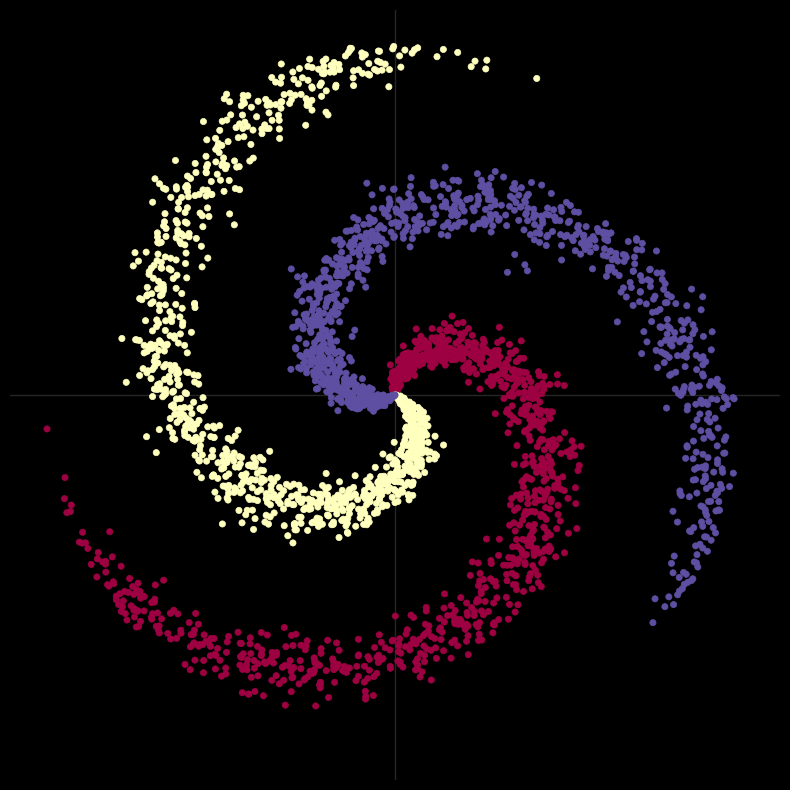

In [4]:
pl.plot_data(X, y)

### Model Training

In [5]:
# Define model architeture
# model = keras.Sequential(
#     [
#         keras.layers.Input(shape=(d, )),
#         keras.layers.Dense(100, activation="relu"),
#         keras.layers.Dense(c),
#     ]
# )

## Functional API
inputs = keras.layers.Input(shape=(d, ))
x = keras.layers.Dense(100, activation='relu')(inputs)
outputs = keras.layers.Dense(c)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603 (2.36 KB)
Trainable params: 603 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [6]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = keras.optimizers.legacy.SGD(learning_rate=1e-3)
optimizer = keras.optimizers.legacy.Adam(learning_rate=1e-4)
accuracy = keras.metrics.SparseCategoricalAccuracy()

In [7]:
# Define callback for Tensorboard and Model Checkpoint
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="./logs/mlp-spiral/" + current_time,
    update_freq="epoch"
)

checkpoint_dir = os.path.join(MODELDIR, f"mlp-spiral-{current_time}")

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir, "weights-{epoch:02d}-{val_loss:.2f}.hdf5")
modelcp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True
)

In [8]:
# Compile model
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=[accuracy],
)

In [9]:
# Train model
model.fit(
    x=X,
    y=y, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_data=(X, y),
    callbacks=[tensorboard_callback, modelcp_callback]
)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 1.0796 - sparse_categorical_accuracy: 0.3863 - val_loss: 1.0647 - val_sparse_categorical_accuracy: 0.4547
Epoch 2/100
94/94 [==============================] - 0s 988us/step - loss: 1.0510 - sparse_categorical_accuracy: 0.4827 - val_loss: 1.0371 - val_sparse_categorical_accuracy: 0.4997
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 1.0243 - sparse_categorical_accuracy: 0.5153 - val_loss: 1.0112 - val_sparse_categorical_accuracy: 0.5227
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.9988 - sparse_categorical_accuracy: 0.5237 - val_loss: 0.9863 - val_sparse_categorical_accuracy: 0.5303
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.9745 - sparse_categorical_accuracy: 0.5323 - val_loss: 0.9622 - val_sparse_categorical_accuracy: 0.5347
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.9511 - sparse_categorical_ac

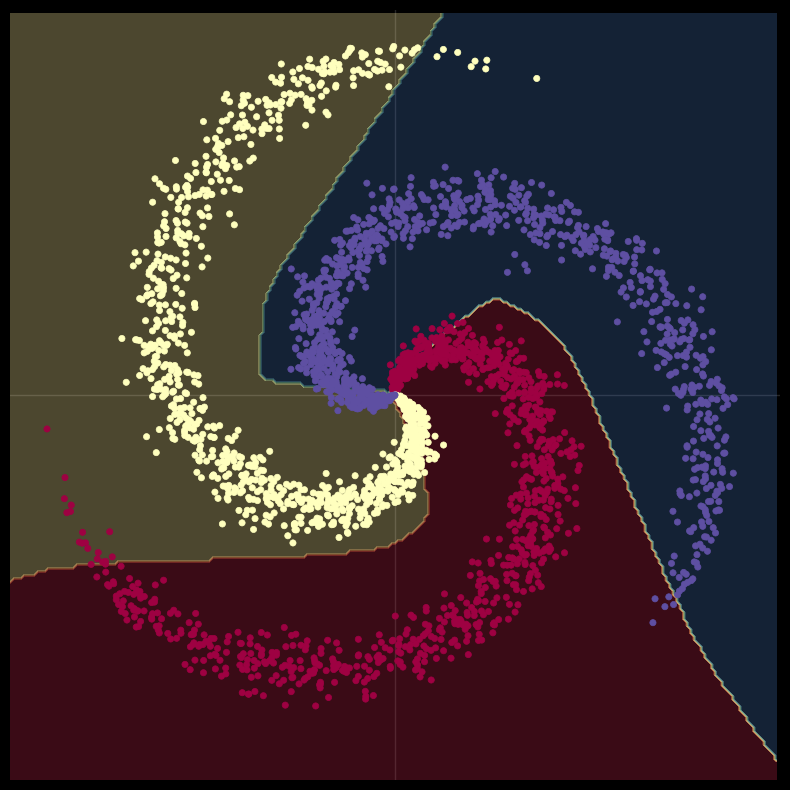

In [10]:
pl.plot_model(X, y, model)